# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## Importing the necessary libraries

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
#importing necessary libraries for EDA, Visualization & Miscellaneous

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import math

# Importing libraries for building linear regression model

from sklearn import linear_model

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Importing libraries for scaling the data

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import RobustScaler

## Loading the dataset

In [157]:
#reading the dataset

df = pd.read_csv('/content/drive/MyDrive/MIT Data Science/Elective Project/data input/Boston.csv')

In [158]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Data Overview

- Observations
- Sanity checks

In [159]:
#checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [160]:
#how many unique values in each column?
df.nunique()

,0
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


In [161]:
#checking what proportion of towns are adjacent to the Charles River
df['CHAS'].value_counts(normalize=True)

,proportion
CHAS,
0,0.93083
1,0.06917


**Observations:**

*   There are 506 entries with no missing values in the dataset.
*   All of the variables are numerical - we can therefor observe the distributions of all explanatory variables with a similar method.
*   All variables have more than one unique value, hence all could be relevant for the analysis. CHAS has only two, which is appropriate given the dummy for being adjacent to the Charles River (or not).
*   Majority of towns or suburbs are not adjacent to the Charles River (roughly 93%, in fact).









## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

### **Univariate Analysis**

In [162]:
#numerical distribution summary of all variables

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


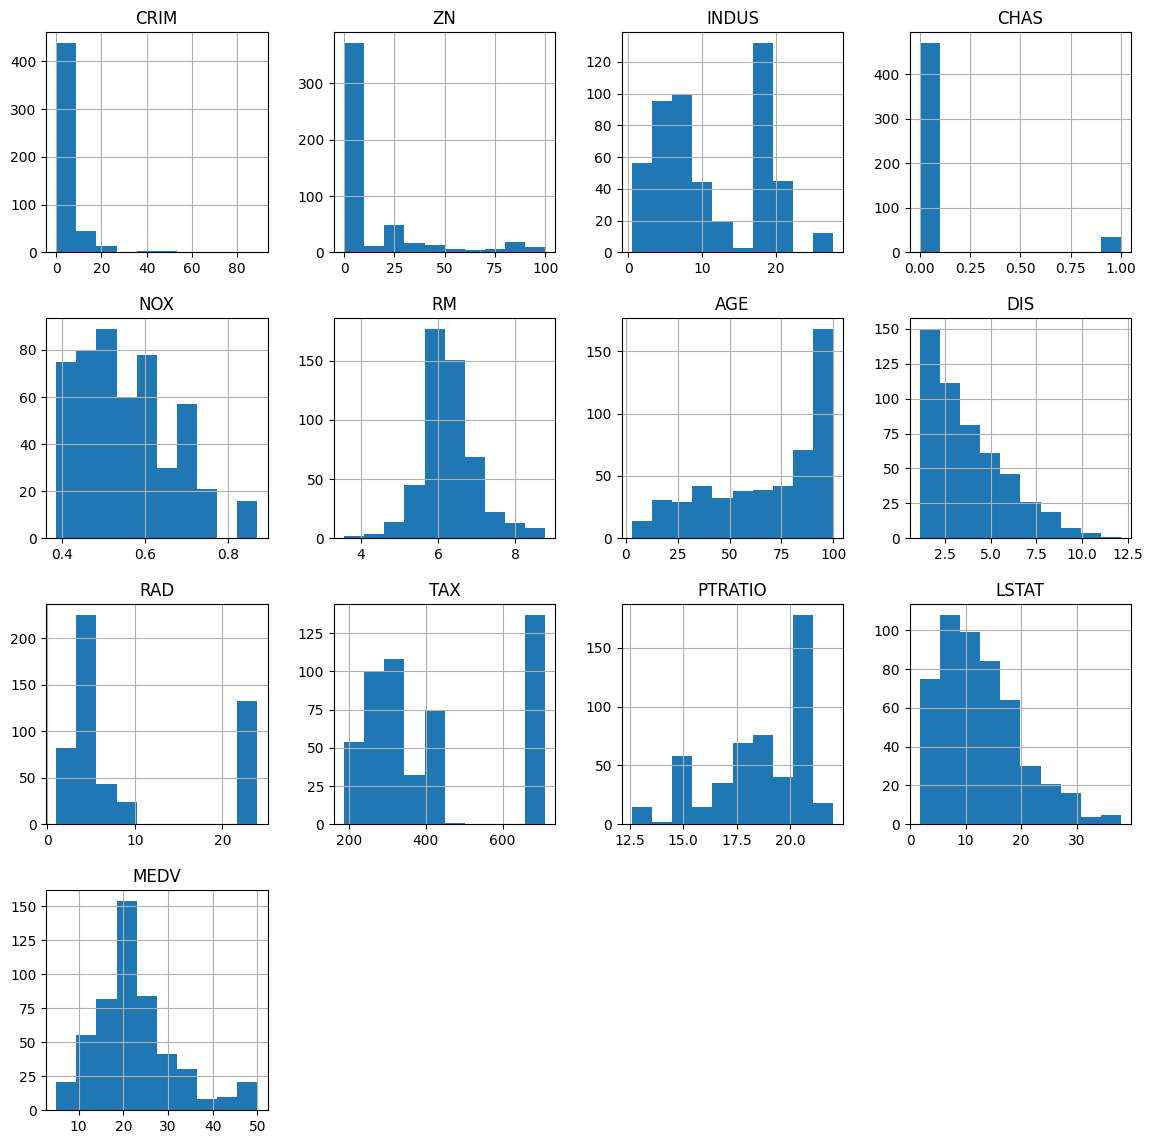

In [163]:
#visual distribution summary of features and Median House Value

df.hist(figsize = (14, 14))

plt.show()

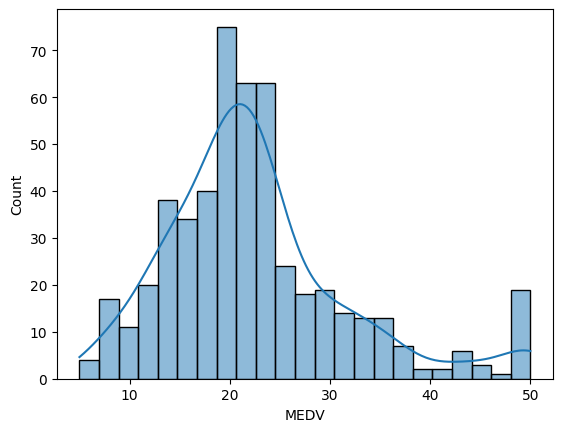

In [164]:
#Taking a closer look at the dependent variable - Median House Value (MEDV)

sns.histplot(x = 'MEDV', data = df, kde = True);

**Observations -**

*   We can see mild skew in MEDV, but not to the extent that it follows the power law distribution.
*   The distribution roughly follows a normal distribution, only with a longer tail towards higher median values of homes for towns/suburbs.
*   The distribution is centered around a mean of approximately 22,500 dollars.





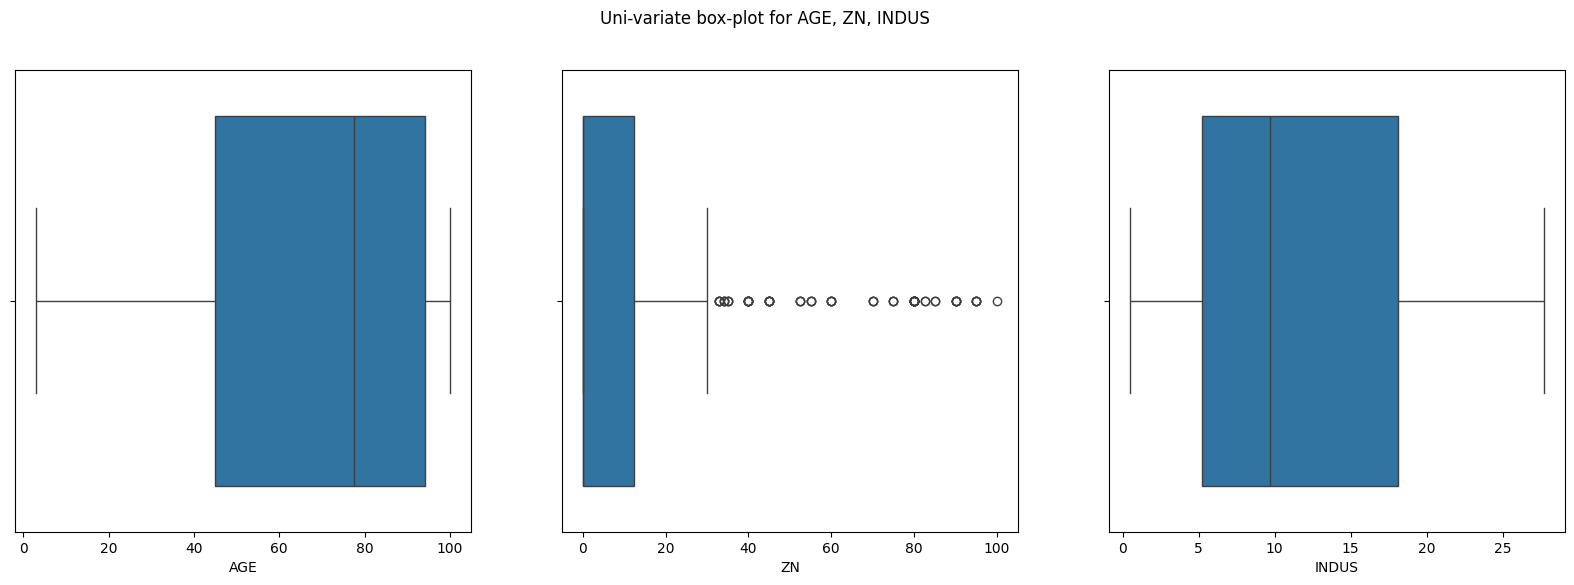

In [165]:
#visualizing univariate box-plot distributions for skew & outliar features of distribution

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Uni-variate box-plot for AGE, ZN, INDUS')

sns.boxplot(data = df['AGE'], orient = "h", ax = axes[0]);

sns.boxplot(data = df['ZN'], orient = "h", ax = axes[1]);

sns.boxplot(data = df['INDUS'], orient = "h", ax = axes[2]);

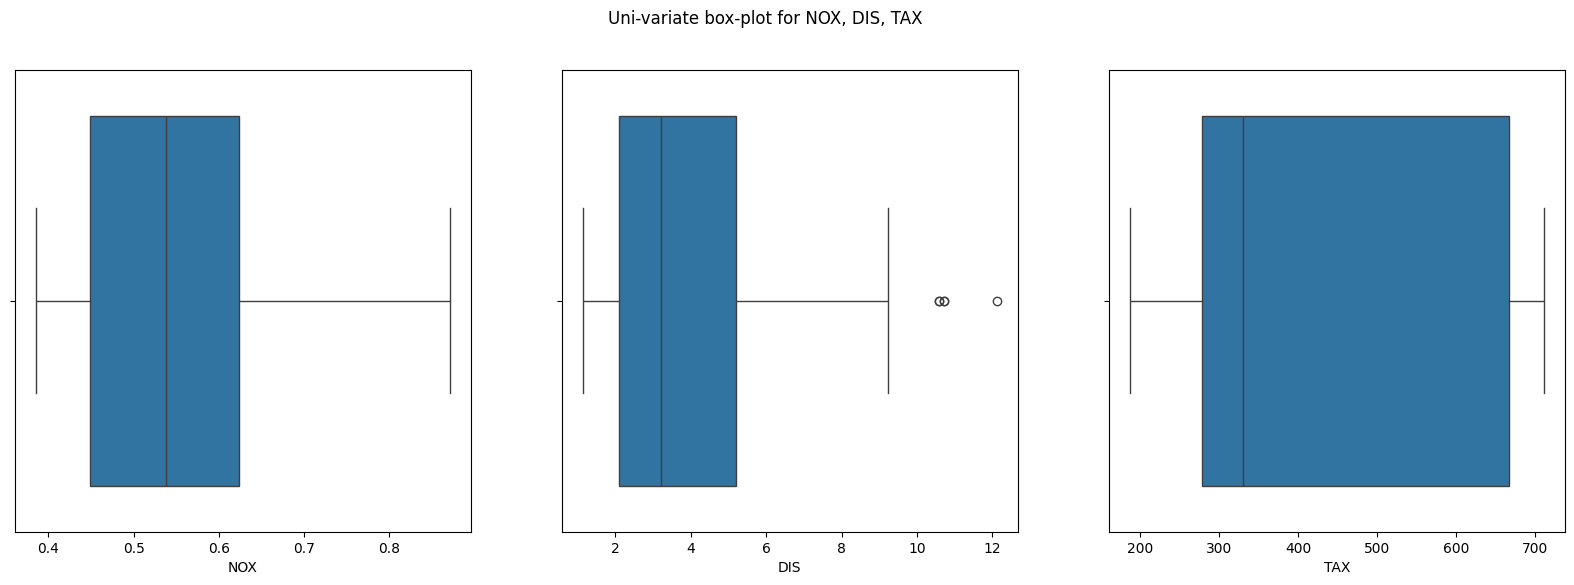

In [166]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Uni-variate box-plot for NOX, DIS, TAX')

sns.boxplot(data = df['NOX'], orient = "h", ax = axes[0]);

sns.boxplot(data = df['DIS'], orient = "h", ax = axes[1]);

sns.boxplot(data = df['TAX'], orient = "h", ax = axes[2]);

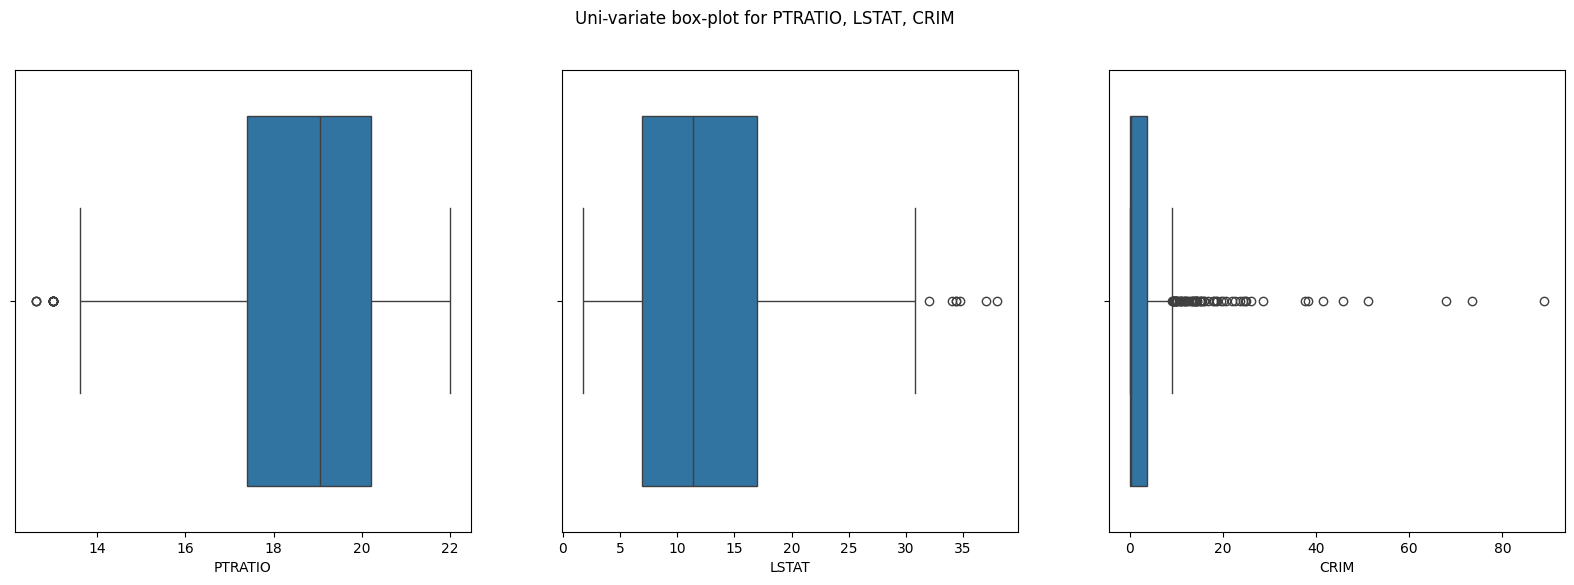

In [167]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Uni-variate box-plot for PTRATIO, LSTAT, CRIM')

sns.boxplot(data = df['PTRATIO'], orient = "h", ax = axes[0]);

sns.boxplot(data = df['LSTAT'], orient = "h", ax = axes[1]);

sns.boxplot(data = df['CRIM'], orient = "h", ax = axes[2]);

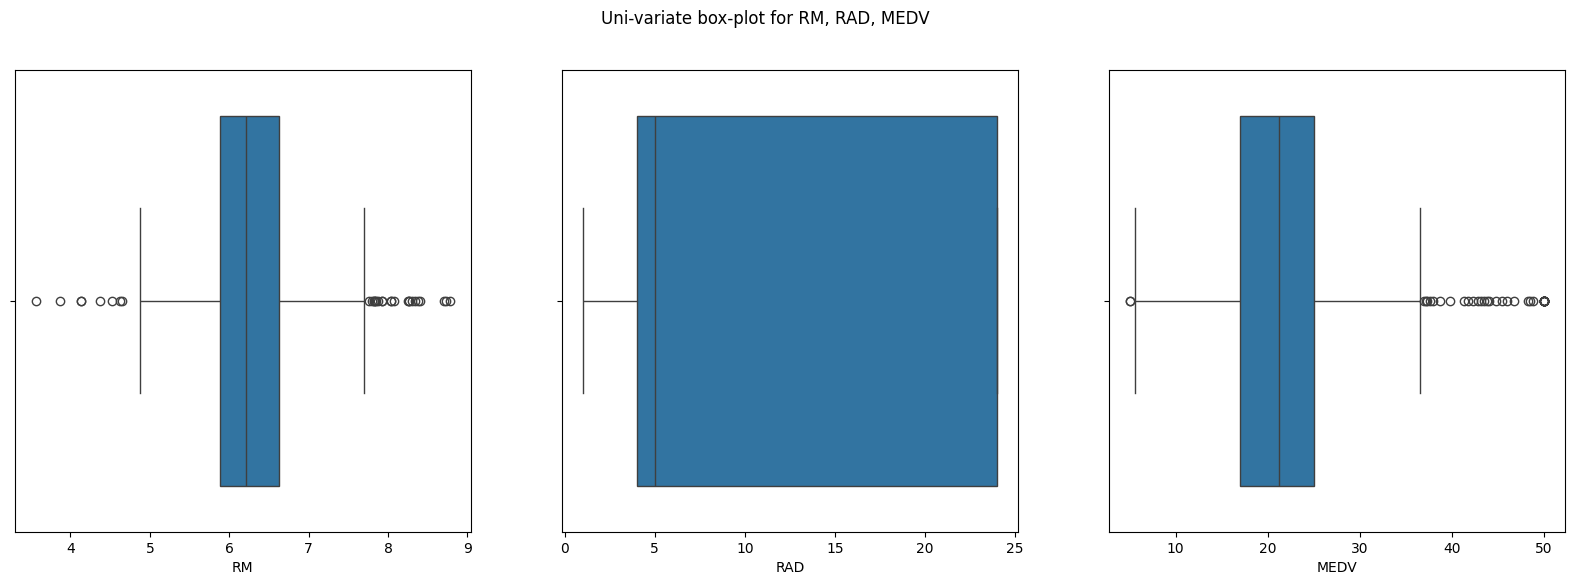

In [168]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Uni-variate box-plot for RM, RAD, MEDV')

sns.boxplot(data = df['RM'], orient = "h", ax = axes[0]);

sns.boxplot(data = df['RAD'], orient = "h", ax = axes[1]);

sns.boxplot(data = df['MEDV'], orient = "h", ax = axes[2]);

**Simple Linear Regression - Each feature vs. MEDV to begin with**

In [169]:
# Converting all variables from pandas dataframe to numpy array format.

age = df.AGE.values.reshape(len(df['AGE']), 1)
zn = df.ZN.values.reshape(len(df['ZN']), 1)
indus = df.INDUS.values.reshape(len(df['INDUS']), 1)
nox = df.NOX.values.reshape(len(df['NOX']), 1)
dis = df.DIS.values.reshape(len(df['DIS']), 1)
tax = df.TAX.values.reshape(len(df['TAX']), 1)
ptratio = df.PTRATIO.values.reshape(len(df['PTRATIO']), 1)
lstat = df.LSTAT.values.reshape(len(df['LSTAT']), 1)
crim = df.CRIM.values.reshape(len(df['CRIM']), 1)
rm = df.RM.values.reshape(len(df['RM']), 1)
rad = df.RAD.values.reshape(len(df['RAD']), 1)
chas = df.CHAS.values.reshape(len(df['CHAS']), 1)
medv = df.MEDV.values.reshape(len(df['MEDV']), 1)

In [170]:
#creating a for-loop that will test each feature against medv in a simple linear regression.

output_list = []
rsquared_list = []

for feature in [age,zn,indus,nox,dis,tax,ptratio,lstat,crim,rm,rad,chas]:
  #creating the linear model
  feature_model = linear_model.LinearRegression()
  #fitting the relevant feature against MEDV
  feature_model.fit(feature, medv)

  #coefficients & intercept metric of feature
  coeffs_feature = np.array(list(feature_model.intercept_.flatten()) + list(feature_model.coef_.flatten()))
  coeffs_feature = list(coeffs_feature)
  #adding coefficient to the output list
  output_list.append(coeffs_feature)

  #R-squared metric
  feature_rsq = feature_model.score(feature, medv)
  #add r-squared metric to the r_squared list
  rsquared_list.append(feature_rsq)

In [171]:
#turning the list of intercepts & coefficients into a dataframe
metric_Df_SLR =  pd.DataFrame(output_list)

#renaming the headers & index reference
metric_Df_SLR.columns = ['Intercept','Coefficient']
metric_Df_SLR.index = ['AGE', 'ZN', 'INDUS','NOX','DIS','TAX','PTRATIO','LSTAT','CRIM','RM','RAD','CHAS']

#R-squared dataframe
rsq_DF_SLR = pd.DataFrame(rsquared_list)
#renaming the column header & index reference (same as coefficient + intercept DF)
rsq_DF_SLR.columns = ['R^2']
rsq_DF_SLR.index = ['AGE', 'ZN', 'INDUS','NOX','DIS','TAX','PTRATIO','LSTAT','CRIM','RM','RAD','CHAS']

#combining dataframes for final output of SLR analysis
output_metrics = [metric_Df_SLR, rsq_DF_SLR]
pd.concat(output_metrics, axis=1)

,Intercept,Coefficient,R^2
AGE,30.978678,-0.123163,0.142095
ZN,20.917579,0.142140,0.129921
INDUS,29.754897,-0.648490,0.233990
NOX,41.345874,-33.916055,0.182603
DIS,18.390088,1.091613,0.062464
TAX,32.970654,-0.025568,0.219526
PTRATIO,62.344627,-2.157175,0.257847
LSTAT,34.553841,-0.950049,0.544146
CRIM,24.033106,-0.415190,0.150780
RM,-34.670621,9.102109,0.483525


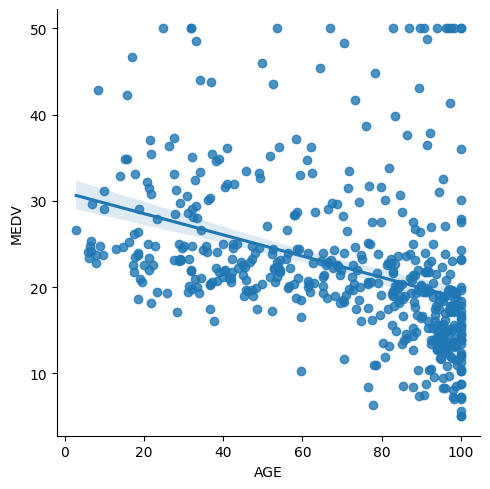

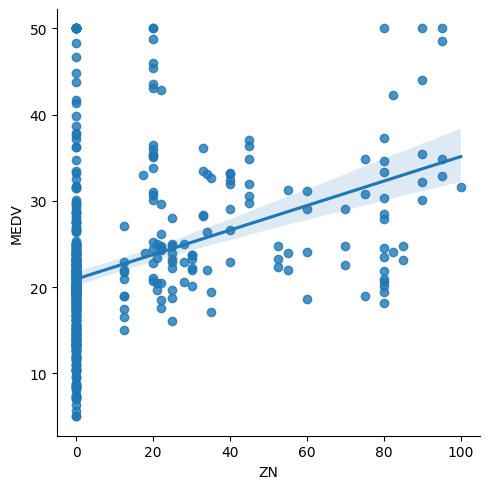

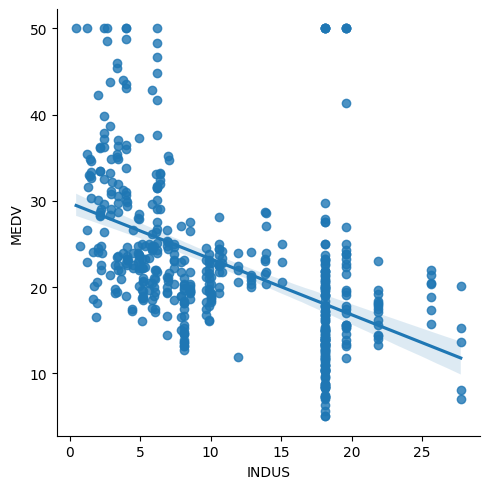

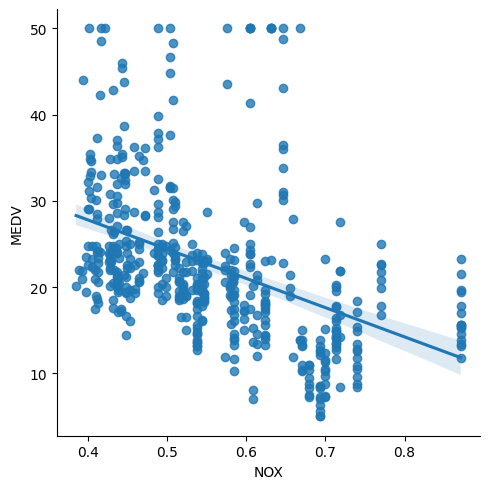

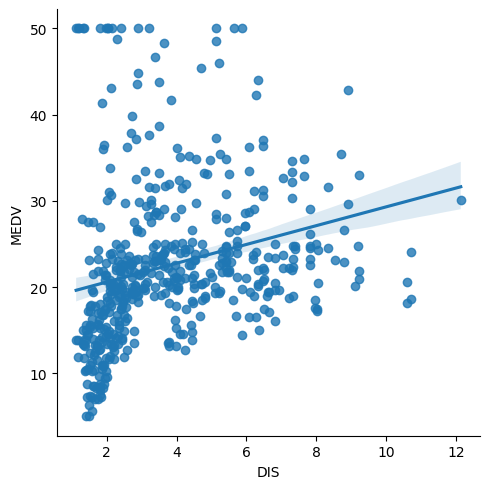

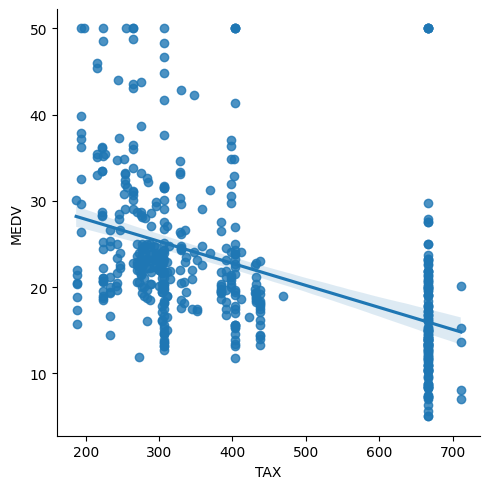

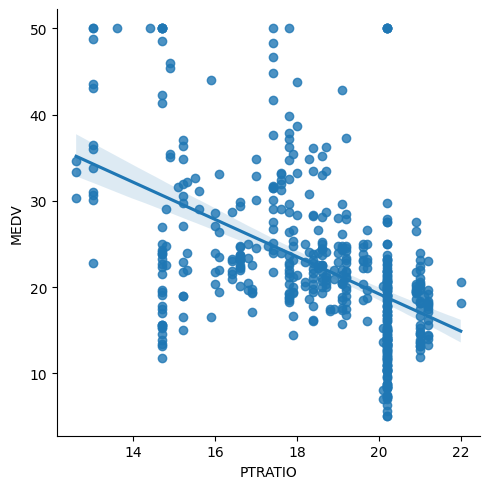

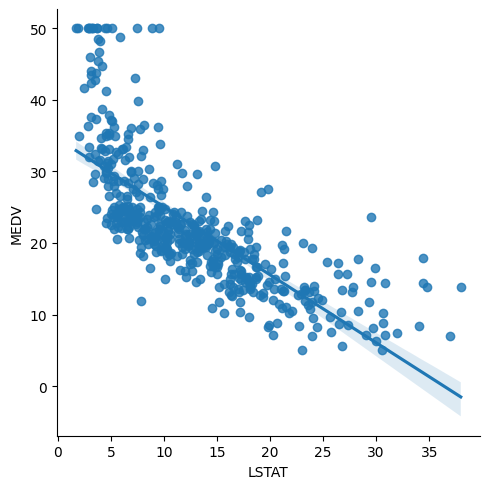

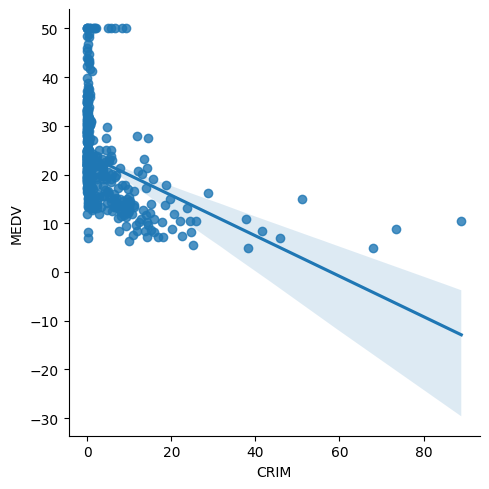

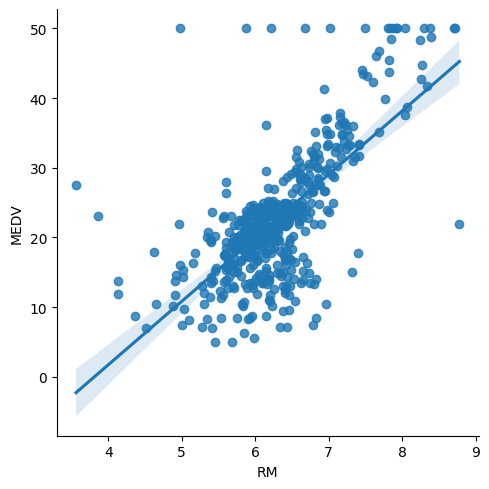

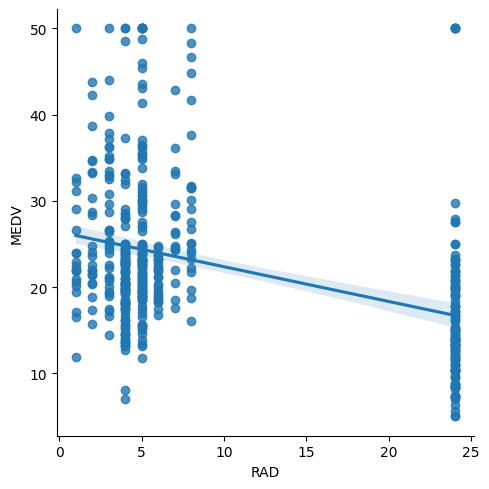

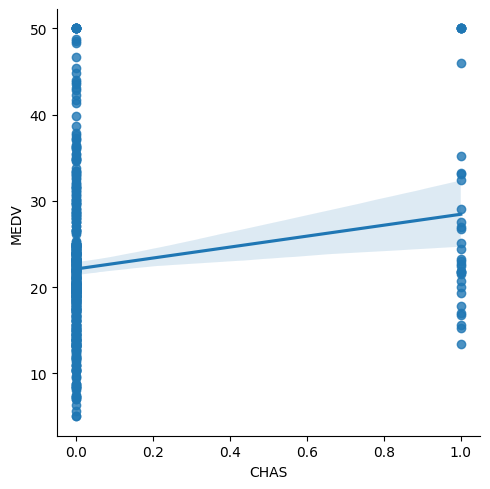

In [172]:
#Let's visualize these marginal relationships with confidence bands

import seaborn as sns

sns.lmplot(x = 'AGE', y = 'MEDV', data = df)

sns.lmplot(x = 'ZN', y = 'MEDV', data = df )

sns.lmplot(x = 'INDUS', y = 'MEDV', data = df)

sns.lmplot(x = 'NOX', y = 'MEDV', data = df)

sns.lmplot(x = 'DIS', y = 'MEDV', data = df)

sns.lmplot(x = 'TAX', y = 'MEDV', data = df)

sns.lmplot(x = 'PTRATIO', y = 'MEDV', data = df)

sns.lmplot(x = 'LSTAT', y = 'MEDV', data = df)

sns.lmplot(x = 'CRIM', y = 'MEDV', data = df)

sns.lmplot(x = 'RM', y = 'MEDV', data = df)

sns.lmplot(x = 'RAD', y = 'MEDV', data = df)

sns.lmplot(x = 'CHAS', y = 'MEDV', data = df)

**Observations -**

*   We can see that LSTAT has the highest R^2, followed by RM and PTRATIO.
*   Most coefficients indicate a negative marginal relationships between the feature and our target median household value variable.
*  i.e. older homes, more industrialization, more nitric oxide concentration, higher property tax, higher pupil-teacher ratio, greater 'low-status' population, higher crime rate, and easier access to radial highways all have a negative marginal influence on the median value of a town/suburb's median house value.
*  Greater amounts of residential land zoned, greater distance to employment centers, higher numbers of rooms per dwelling, and proximity to the Charles River all indicate a positive maginal relationship on the town/suburbs median home value.
*   Having said this, the 'fitness' of features in the R-squared metric suggest that only the negative marginal influences of industrialization, pupil-teacher ratio, and proportion of lower status population may be useful as explanatory variables - and similarly, average number of rooms per dwelling as a positive marginal influence explanatory variable.
*   As a result, one simple model to test for max explanatory power could be medv ~ indus + ptratio + lstat + rm

### **Bivariate Analysis**

<Axes: >

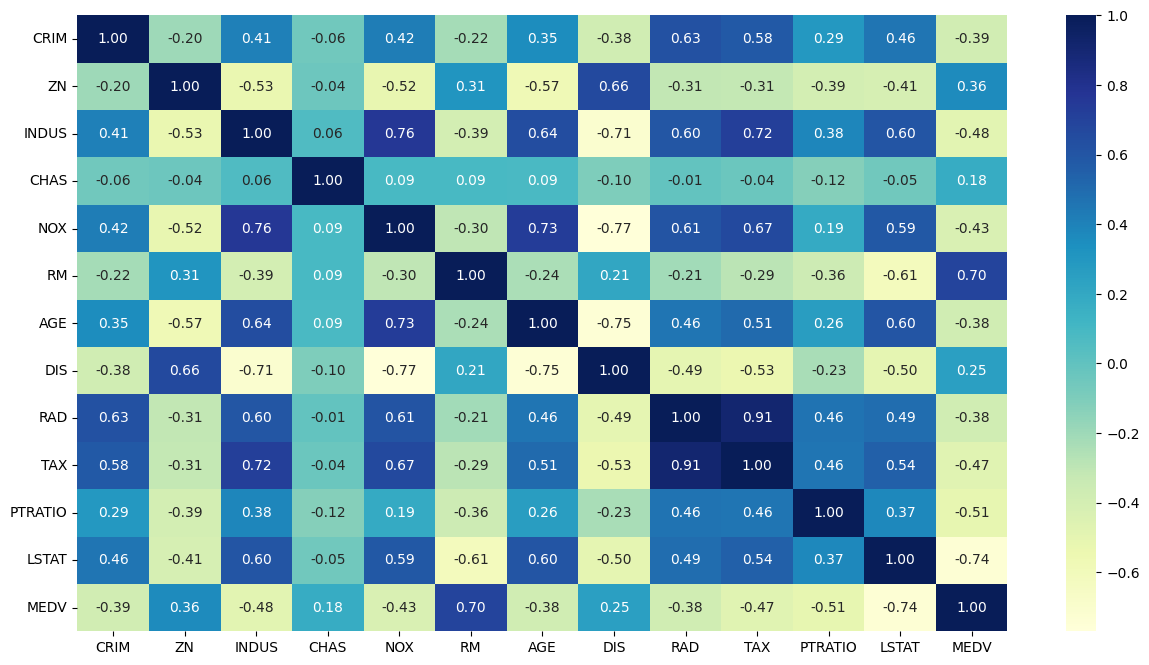

In [174]:
#Correlation between variables

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

**Scatter Plots - High Correlation Features**

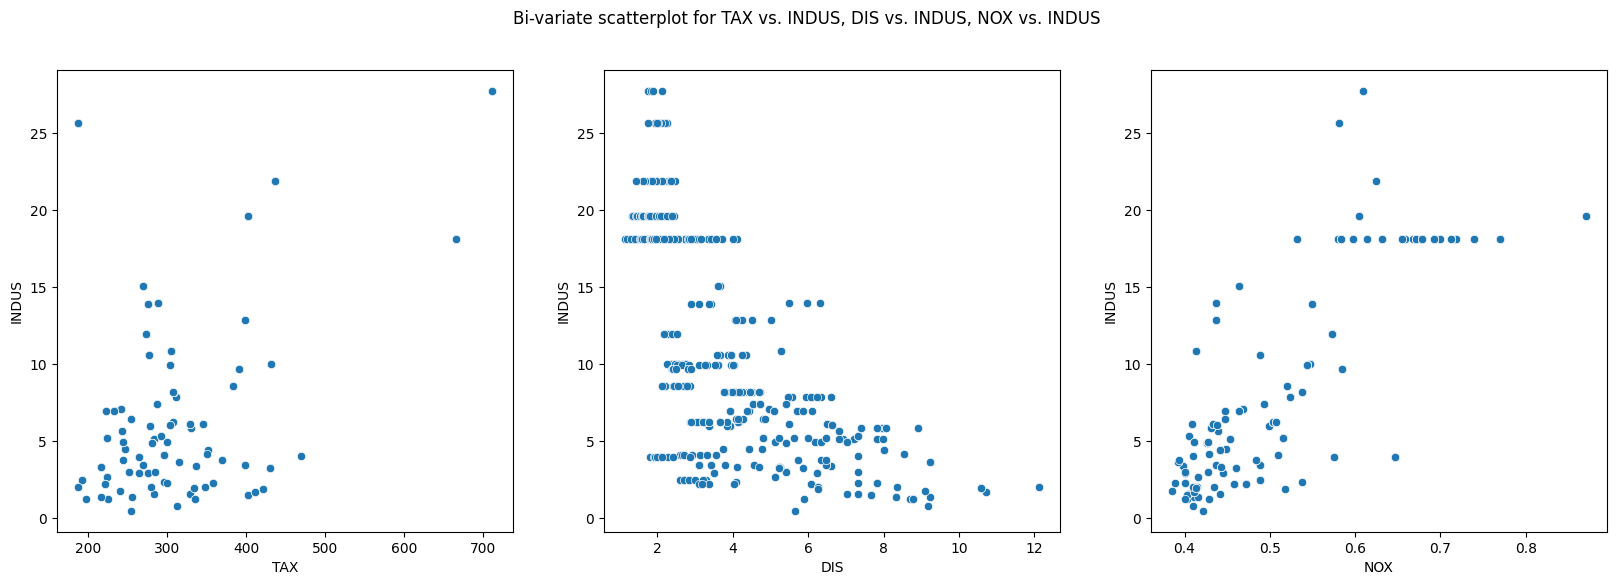

In [175]:
#Visualizing correlations between independent variables

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Bi-variate scatterplot for TAX vs. INDUS, DIS vs. INDUS, NOX vs. INDUS')

sns.scatterplot(x = 'TAX', y = 'INDUS', data = df, ax = axes[0]);

sns.scatterplot(x = 'DIS', y = 'INDUS', data = df, ax = axes[1]);

sns.scatterplot(x = 'NOX', y = 'INDUS', data = df, ax = axes[2]);

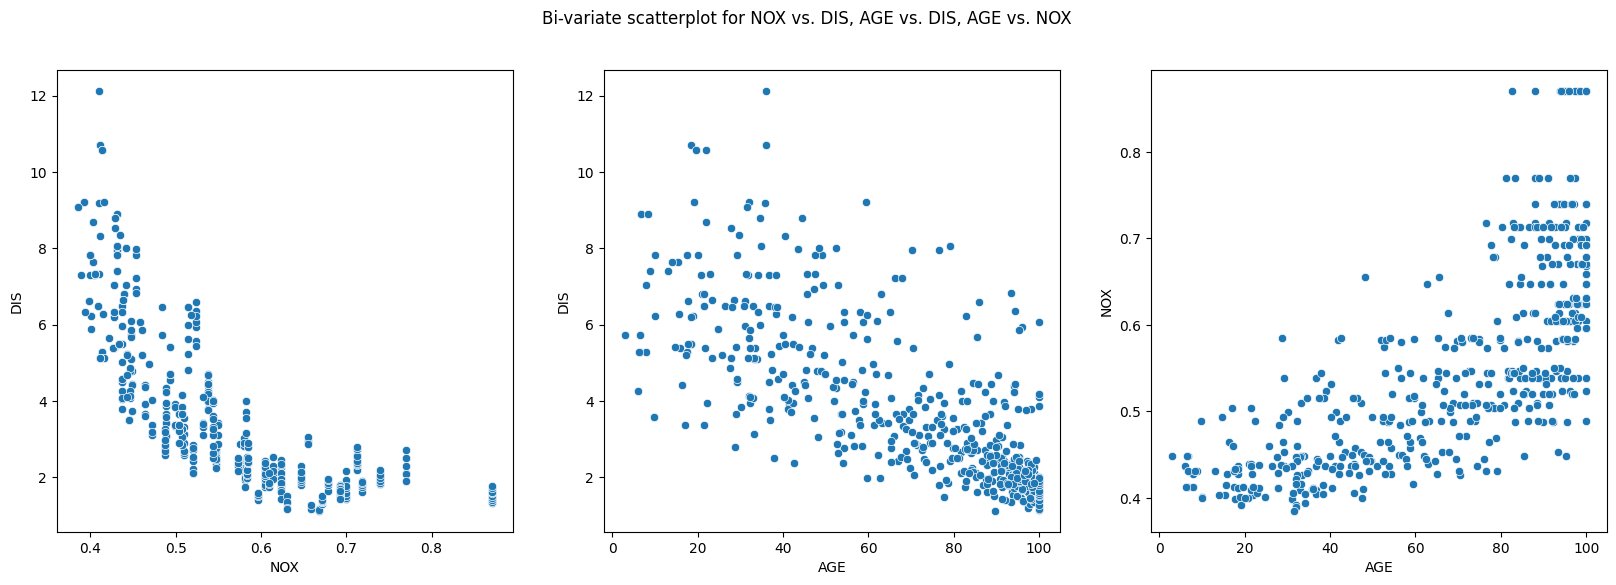

In [176]:
#Visualizing correlations between independent variables

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Bi-variate scatterplot for NOX vs. DIS, AGE vs. DIS, AGE vs. NOX')

sns.scatterplot(x = 'NOX', y = 'DIS', data = df, ax = axes[0]);

sns.scatterplot(x = 'AGE', y = 'DIS', data = df, ax = axes[1]);

sns.scatterplot(x = 'AGE', y = 'NOX', data = df, ax = axes[2]);

**Observations -**

*   The correlation between INDUS and TAX, DIS, & NOX are all above 0.70 or below -0.70 and are therefor probably meaningful.
*   DIS & NOX, DIS & AGE and NOX & AGE also show meaningful correlations, positive or negative.
*   These relationships should be considered in testing for the multicollinearity assumption.







**Scatter Plots - Features vs. MEDV**

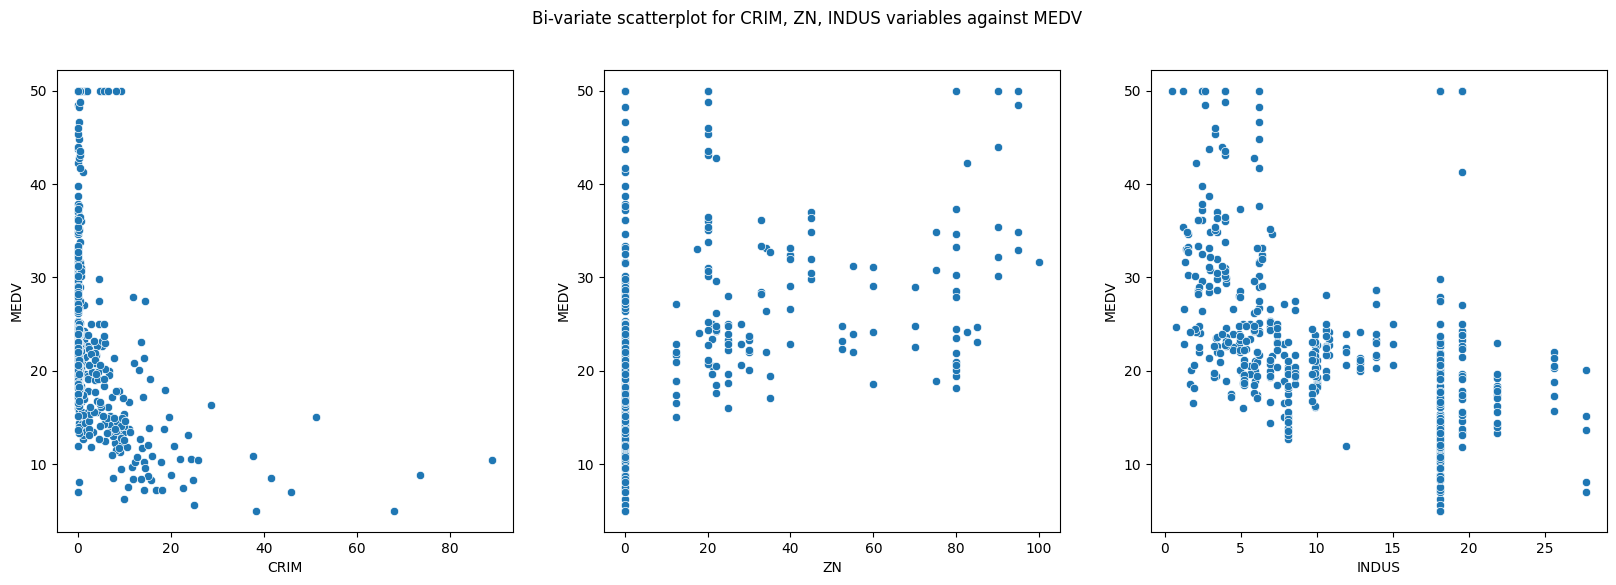

In [177]:
#Visualizing correlations between independent variables and median house value

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Bi-variate scatterplot for CRIM, ZN, INDUS variables against MEDV')

sns.scatterplot(x = 'CRIM', y = 'MEDV', data = df, ax = axes[0]);

sns.scatterplot(x = 'ZN', y = 'MEDV', data = df, ax = axes[1]);

sns.scatterplot(x = 'INDUS', y = 'MEDV', data = df, ax = axes[2]);

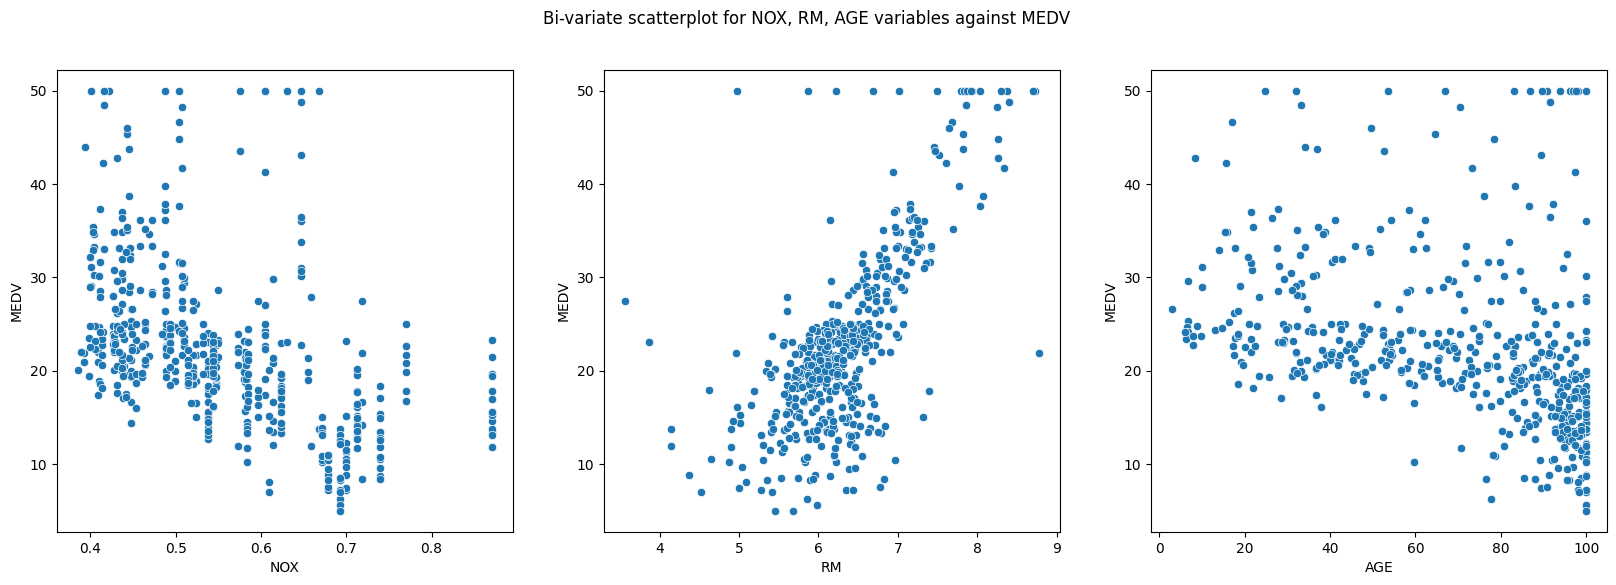

In [178]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Bi-variate scatterplot for NOX, RM, AGE variables against MEDV')

sns.scatterplot(x = 'NOX', y = 'MEDV', data = df, ax = axes[0]);

sns.scatterplot(x = 'RM', y = 'MEDV', data = df, ax = axes[1]);

sns.scatterplot(x = 'AGE', y = 'MEDV', data = df, ax = axes[2]);

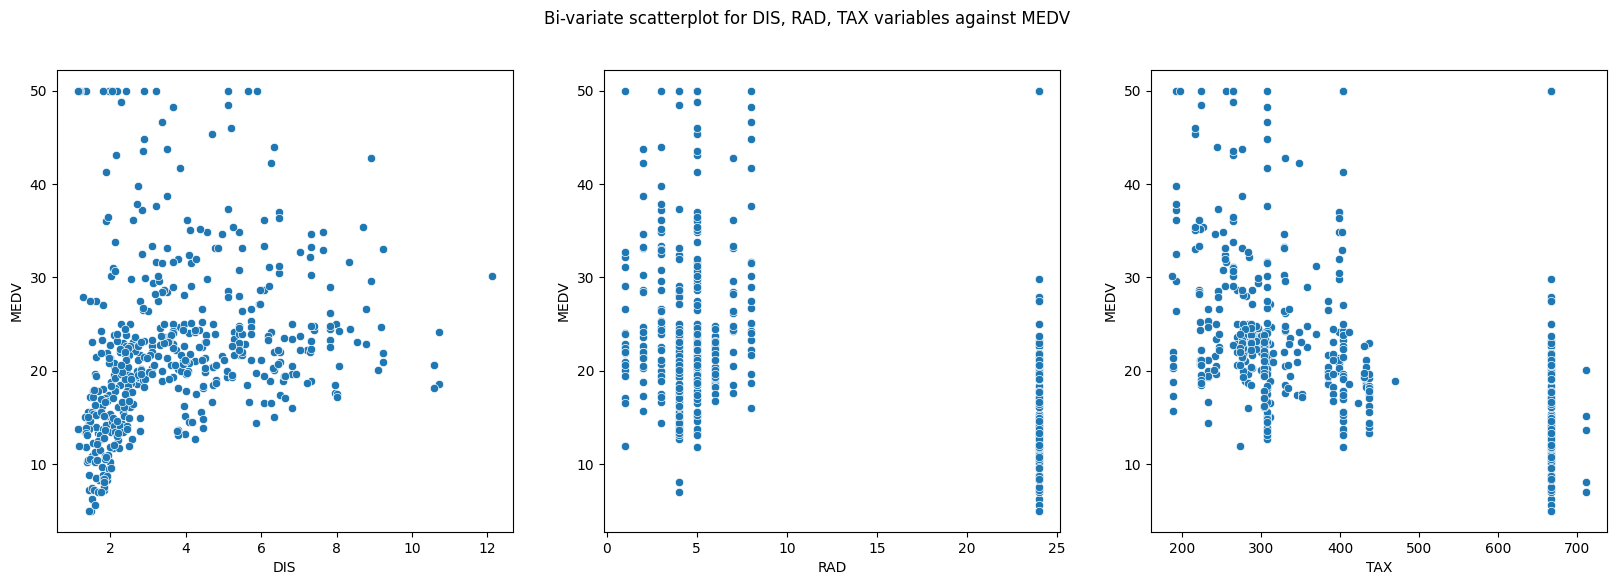

In [179]:
fig, axes = plt.subplots(1, 3, figsize = (20, 6))

fig.suptitle('Bi-variate scatterplot for DIS, RAD, TAX variables against MEDV')

sns.scatterplot(x = 'DIS', y = 'MEDV', data = df, ax = axes[0]);

sns.scatterplot(x = 'RAD', y = 'MEDV', data = df, ax = axes[1]);

sns.scatterplot(x = 'TAX', y = 'MEDV', data = df, ax = axes[2]);


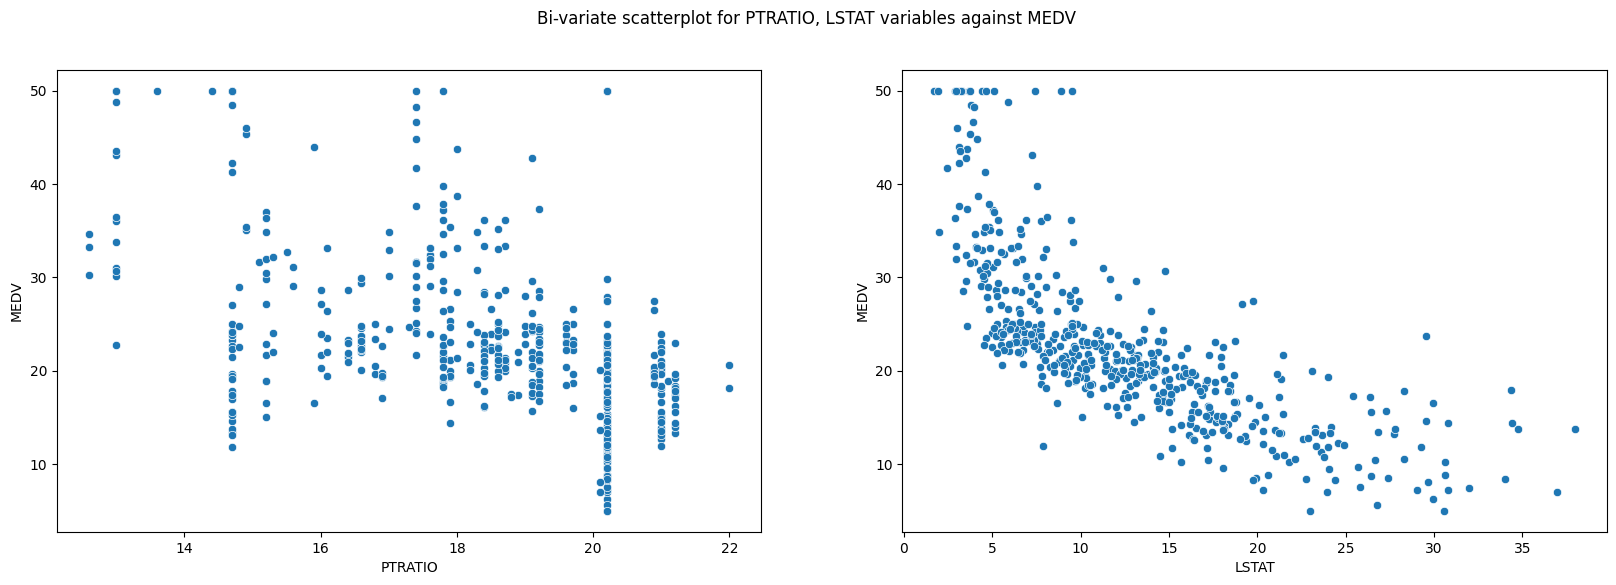

In [180]:
fig, axes = plt.subplots(1, 2, figsize = (20, 6))

fig.suptitle('Bi-variate scatterplot for PTRATIO, LSTAT variables against MEDV')

sns.scatterplot(x = 'PTRATIO', y = 'MEDV', data = df, ax = axes[0]);

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df, ax = axes[1]);

### **Summary of EDA**

**Distributions -**


*   CRIM: crime rate varies widely depending on town and is heavily right-skewed with most crime rates less than 10%.
*   ZN: towns with residential land is also skewed right with most towns maintaining a lower portion of residential land zoned for lots in excess of 25,000 sq.ft.
*   INDUS: Non-retail business acreage has a bi-modal distribution with a broader group of towns maintaining a 0-10% proportion, but a seemingly large group of towns having a specific 18-20% of industrial presence.
*   CHAS: Naturally, there are a larger proportion of towns that are not coded as being adjacent to the Charles River. Rouhgly 7% of towns are adjacent to the river.
*   NOX: Nitric Oxide concentration in towns is skewed right - majority of town in Boston have between 0.4-0.6 pp10m.
*   RM: The distribution of rooms per dwelling is relatively normal, leaning towards a symmetrical distribution around 6 rooms per dwelling.
*  AGE: The age of the units is skewed left - i.e. the majority of Boston towns maintain owner occupied units that were built prior to 1940.
*   DIS: the weighted distance for towns to major employment centers is relatively smoothly parabolic - i.e. majority of towns in Boston are close to major emplyoment centers, with a parabolic decline in towns that are not proximate to major employment centers.
*   RAD: access to radial highways is bimodal with most towns on the lower end of the index scale, but with a sharp concentration of towns also in the upper bracket of the distribution near the max of 24.
*   TAX: the full property tax rate exhibits a similar bimodal distribution where majority of properties are in the 2%-4% range, i.e. 200-400 per 10,000 dollar bracket. There is also a sharp concentration of towns with properties in the highest bucket of the data set (6.7 - 7.1%).
*   PTRATIO: The average pupil-teacher ratio is above 18%, but the distribution shows that this is somewhat skewed by a signficant concentrations of towns with a ratio above 20%. There is a significant body of towns that have between 15-20% pupil-teacher ratios.
*   LSTAT: Towns with lower proportions of lower status population are more common that not - i.e. while there are towns that have near 40% population classes as lower status, the average Boston town in this survey only has 12-13% lower status (% of population).

**MEDV -**

*   The median value of homes (our predictor variable) is relatively normally distributed, centered around a mean of 22,500 dollars, and with majority (2/3) of the distribtuion within 9000 dollars of value.
*   Having said this, the longer right-tail of the kde function on the MEDV historigram shows us that the distribution is right-skewed in nature. This is also confirmed by the MEDV box-plot, which shows a signficant amount of data to the right (above) the upper outlier bound (Q3+1.5IQR).


**Bivariate Analysis & Correlations -**


*   There is seemingly high correlation between DIS and several other explantory variables (AGE, NOX, INDUS). When observing scatter plots between these independent variable pairs we can see that...
*   The distance of homes to employment centers is likely to be correlated to less renewal of homes i.e. less upkeep of distant residential area, as well as less NO2 in the atmosphere due to less population density, as well as less industrial infrastructure & activity.
*   These correlations are something to keep in mind when assessing the quality of predictive models.
*   LSTAT & RM appear most highly correlated to our target variable.




## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing Value Treatment -**

There is no need for missing value treatment given there are no null values.

**Log Transformation -**

The estimator variable (MEDV) is not power-law distributed as seen in EDA, and therefor does not require log transformation. Although, this is something that we can test in feature engineering.

**Feature Engineering -**

*   I suspected that the AGE and INDUS variables were likely to be influenced by the distance from employment centers.
*   This was also confirmed by our correlation matrix, where both interactions showed above 0.70, or below -0.70 correlation coefficients.
*   Hence, it might be worth creating interaction variables to capture this and test whether they add explanatory power to the model.






In [181]:
#adding multiplicative interaction variables between AGE, DIS & INDUS, DIS

df['AGE_DIS'] = df['AGE'] * df['DIS']

df['INDUS_DIS'] = df['INDUS'] * df['DIS']

In [182]:
#try a model with log transformation of skewed feature variables

df['CRIM_transform'] = np.log10(df['CRIM'])
df['ZN_transform'] = np.log10(df['ZN']+1) #adjusting for the -inf values

**Outlier Detection & Treatment -**

In [183]:
#variables that might aid model performance using outlier treatment

clip_var = ['RM', 'CRIM', 'ZN']

for i in clip_var:

  transformed = 'clipped_' + i

  #setting upper limit to 0.90 quantile
  upper_limit = df[i].quantile(0.90)

  #setting lower limit to 0.10 quantile
  lower_limit = df[i].quantile(0.10)

  df[transformed] = df[i].clip(lower_limit, upper_limit, axis = 0)

In [184]:
#comparing original variable to clip variable distribution

print(df[clip_var].describe())
print('\n####################################\n')
print(df[['clipped_RM','clipped_CRIM','clipped_ZN']].describe())

               RM        CRIM          ZN
count  506.000000  506.000000  506.000000
mean     6.284634    3.613524   11.363636
std      0.702617    8.601545   23.322453
min      3.561000    0.006320    0.000000
25%      5.885500    0.082045    0.000000
50%      6.208500    0.256510    0.000000
75%      6.623500    3.677083   12.500000
max      8.780000   88.976200  100.000000

####################################

       clipped_RM  clipped_CRIM  clipped_ZN
count  506.000000    506.000000  506.000000
mean     6.276510      2.415456    8.270751
std      0.489175      3.719527   14.852636
min      5.593500      0.038195    0.000000
25%      5.885500      0.082045    0.000000
50%      6.208500      0.256510    0.000000
75%      6.623500      3.677083   12.500000
max      7.151500     10.753000   42.500000


**Observations -**

*   The max values of CRIM and ZN are most heavily impacted by the outlier treatment, reducing from 89 to 10.7 and 100 to 42.5, respectively.
*   This has shifted the mean and standard deviation significantly, however the median value remains the same.



**Data Preparation for Modeling -**

In [185]:
#splitting the data into train and test datasets
train, test = train_test_split(df, test_size = 0.20, train_size = 0.8)

#creating a validation set
train, validation = train_test_split(train, test_size = 0.2, train_size = 0.80)

In [186]:
#checking the sizes of our train, validation & test datasets

train.shape, validation.shape, test.shape

((323, 20), (81, 20), (102, 20))

In [187]:
#Scaling the Data

# Creating an instance of the MinMax Scaler - this seems most appropraite given the abnormal distributions & outliers in the data
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_scaled = scaler.fit_transform(train)

# Converting the train data back to pandas DataFrame
train_scaled = pd.DataFrame(train_scaled, index = train.index, columns = train.columns)

train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_DIS,INDUS_DIS,CRIM_transform,ZN_transform,clipped_RM,clipped_CRIM,clipped_ZN
153,0.029054,0.00,0.692424,0.0,1.000000,0.411573,0.984552,0.044885,0.173913,0.412214,0.223404,0.384743,0.320000,0.230598,0.331576,0.590754,0.000000,0.074134,0.197016,0.000000
246,0.004444,0.22,0.175273,0.0,0.081420,0.488025,0.329557,0.629805,0.260870,0.272901,0.691489,0.200832,0.428889,0.425723,0.532979,0.377088,0.679396,0.330231,0.028151,0.517647
308,0.006527,0.00,0.327554,0.0,0.317328,0.589002,0.819773,0.198956,0.130435,0.223282,0.617021,0.072677,0.395556,0.413745,0.345431,0.420185,0.000000,0.668485,0.042445,0.000000
301,0.000303,0.34,0.183943,0.0,0.085595,0.580379,0.386200,0.396666,0.260870,0.270992,0.372340,0.210264,0.377778,0.330339,0.353282,0.114976,0.770369,0.639602,0.000000,0.800000
105,0.001626,0.00,0.277045,0.0,0.267223,0.438781,0.966014,0.088870,0.173913,0.375954,0.882979,0.403606,0.322222,0.301167,0.152057,0.268081,0.000000,0.165276,0.008813,0.000000


**Observations -**

*   The MinMax Scaler normalized the feature data into a scale between 0 and 1.
*   The features in this dataset are neither distored, nor normally distributed, therefor using a minmax scaler should suffice.



## Model Building - Linear Regression

**MLR 1 - Baseline Model**

In [188]:
#creating features & target variables
features_base = [i for i in train_scaled.columns if i not in ("MEDV", "CRIM_transform", "ZN_transform", "clipped_RM", "clipped_CRIM", "clipped_ZN", "AGE_DIS", "INDUS_DIS")]
target = 'MEDV'

#remove any engineered features
#features_added = [i for i in Ad_df.columns if i not in "Sales"]

In [189]:
#Fitting model for MLR 1

mlr = LinearRegression()

mlr.fit(train[features_base], train[target])

print("********* MLR 1 Training set Metrics **************")

#R-squared
print("R-Squared:", mlr.score(train[features_base], train[target]))

#RMSE
se_train = (train[target] - mlr.predict(train[features_base]))**2
rmse_train = math.sqrt(se_train.mean())
print('RMSE: ', rmse_train)

#MAPE
mape = np.mean(np.abs((train[target] - mlr.predict(train[features_base]))/train[target]) * 100)
mape = round(mape,2)
print('MAPE: ', mape)


********* MLR 1 Training set Metrics **************
R-Squared: 0.7404359900376114
RMSE:  4.547083395444653
MAPE:  15.97


In [190]:
#Statsmodel visual of MLR 1

#adjusting variable arrays to train & scaled data set (for statsmodel vis)

age = train_scaled.AGE.values.reshape(len(train_scaled['AGE']), 1)
zn = train_scaled.ZN.values.reshape(len(train_scaled['ZN']), 1)
indus = train_scaled.INDUS.values.reshape(len(train_scaled['INDUS']), 1)
nox = train_scaled.NOX.values.reshape(len(train_scaled['NOX']), 1)
dis = train_scaled.DIS.values.reshape(len(train_scaled['DIS']), 1)
chas = train_scaled.CHAS.values.reshape(len(train_scaled['CHAS']), 1)
tax = train_scaled.TAX.values.reshape(len(train_scaled['TAX']), 1)
ptratio = train_scaled.PTRATIO.values.reshape(len(train_scaled['PTRATIO']), 1)
lstat = train_scaled.LSTAT.values.reshape(len(train_scaled['LSTAT']), 1)
crim = train_scaled.CRIM.values.reshape(len(train_scaled['CRIM']), 1)
rm = train_scaled.RM.values.reshape(len(train_scaled['RM']), 1)
rad = train_scaled.RAD.values.reshape(len(train_scaled['RAD']), 1)
crim_transform = train_scaled.CRIM_transform.values.reshape(len(train_scaled['CRIM_transform']), 1)
zn_transform = train_scaled.ZN_transform.values.reshape(len(train_scaled['ZN_transform']), 1)
clipped_rm = train_scaled.clipped_RM.values.reshape(len(train_scaled['clipped_RM']), 1)
clipped_crim = train_scaled.clipped_CRIM.values.reshape(len(train_scaled['clipped_CRIM']), 1)
clipped_zn = train_scaled.clipped_ZN.values.reshape(len(train_scaled['clipped_ZN']), 1)
age_dis = train_scaled.AGE_DIS.values.reshape(len(train_scaled['AGE_DIS']), 1)
indus_dis = train_scaled.INDUS_DIS.values.reshape(len(train_scaled['INDUS_DIS']), 1)
medv = train_scaled.MEDV.values.reshape(len(train_scaled['MEDV']), 1)

In [192]:
#Fitting MLR 1 with Statsmodel

lm1 = smf.ols(formula = 'medv ~ age + zn + chas + indus + nox + dis + tax + ptratio + lstat + crim + rm + rad', data = train_scaled).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     73.69
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           2.98e-83
Time:                        21:50:42   Log-Likelihood:                 282.06
No. Observations:                 323   AIC:                            -538.1
Df Residuals:                     310   BIC:                            -489.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5712      0.054     10.498      0.0

**Obervations -**

*   Performance of the MLR model yields better performance than the SLR models - i.e. the adjusted R-squared is 0.73 for MLR 1, whereas the highest R-squared stat across SLR models was the fitting of LSTAT against MEDV, with the feature explaining rouhgly 54.4% of the MEDV variance.
*   Therefor, we can use MLR as a baseline model on the train dataset.
*   It looks like feature variables AGE & INDUS are insignificant to the model, hence we should try to fit without.


**MLR 2 - Baseline + Significant Variables**

In [193]:
#creating features & target variables
features_base2 = [i for i in train_scaled.columns if i not in ("MEDV", "AGE", "INDUS", "CRIM_transform", "ZN_transform", "clipped_RM", "clipped_CRIM", "clipped_ZN", "AGE_DIS", "INDUS_DIS")]
target = 'MEDV'

In [194]:
#Fitting model for MLR 2

mlr.fit(train[features_base2], train[target])

print("********* MLR 2 Training set Metrics **************")

#R-squared
print("R-Squared:", mlr.score(train[features_base2], train[target]))

#RMSE
se_train = (train[target] - mlr.predict(train[features_base2]))**2
rmse_train = math.sqrt(se_train.mean())
print('RMSE: ', rmse_train)

#MAPE
mape = np.mean(np.abs((train[target] - mlr.predict(train[features_base2]))/train[target]) * 100)
mape = round(mape,2)
print('MAPE: ', mape)

********* MLR 2 Training set Metrics **************
R-Squared: 0.7394965819514823
RMSE:  4.555304313667365
MAPE:  16.08


In [195]:
#Fitting MLR 2 with Statsmodel

lm2 = smf.ols(formula = 'medv ~ zn + nox + dis + chas + tax + ptratio + lstat + crim + rm + rad', data = train_scaled).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     88.57
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           5.84e-85
Time:                        21:50:51   Log-Likelihood:                 281.47
No. Observations:                 323   AIC:                            -540.9
Df Residuals:                     312   BIC:                            -499.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5616      0.053     10.599      0.0

**Observations -**

*   The R-squared, RMSE & MAPE performance metrics are broadly similar.
*   All feature variables remain significant to the model.
*   Now, let's build on this model with accounting for features that could benefit from outlier treatment, as desribed earlier.


**MLR 3 - Baseline + Significant Variables + Outlier Treatment**



In [196]:
#creating features & target variables
features_base3 = [i for i in train_scaled.columns if i not in ("MEDV", "AGE", "INDUS", "RM", "CRIM", "ZN","CRIM_transform", "ZN_transform", "AGE_DIS", "INDUS_DIS")]
target = 'MEDV'

In [197]:
#Fitting model for MLR 3

mlr.fit(train[features_base3], train[target])

print("********* MLR 3 Training set Metrics **************")

#R-squared
print("R-Squared:", mlr.score(train[features_base3], train[target]))

#RMSE
se_train = (train[target] - mlr.predict(train[features_base3]))**2
rmse_train = math.sqrt(se_train.mean())
print('RMSE: ', rmse_train)

#MAPE
mape = np.mean(np.abs((train[target] - mlr.predict(train[features_base3]))/train[target]) * 100)
mape = round(mape,2)
print('MAPE: ', mape)

********* MLR 3 Training set Metrics **************
R-Squared: 0.7364449887942164
RMSE:  4.581907539543858
MAPE:  15.57


In [198]:
#Fitting MLR 3 with Statsmodel

lm3 = smf.ols(formula = 'medv ~ nox + dis + tax + chas+ ptratio + lstat + rad + clipped_rm + clipped_crim + clipped_zn', data = train_scaled).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     87.18
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           3.53e-84
Time:                        21:51:24   Log-Likelihood:                 279.59
No. Observations:                 323   AIC:                            -537.2
Df Residuals:                     312   BIC:                            -495.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6643      0.039     16.940   

**Observations -**

*   The reduction in feature variables has resulted in a less powerful model, based on our performance metrics.
*   R-squared, RMSE & MAPE have all marginally worsened after treating RM, CRIM & ZN for outliers at the 90% quantile.
*   The RM & CRIM features remain significant despite the outlier treatment; the overall performance of the model seems to be getting dragged by ZN after outlier treatment.
*   Let's go back to our second model, MLR 2, and see if the log treatment of feature variables CRIM & ZN has any marginal positive influence.





**MLR 4 - Baseline + Significant Variables + Log Transform Treatment**

In [199]:
#creating features & target variables
features_base4 = [i for i in train_scaled.columns if i not in ("MEDV", "AGE", "INDUS", "CRIM", "ZN", "clipped_RM", "clipped_CRIM", "clipped_ZN", "AGE_DIS", "INDUS_DIS")]
target = 'MEDV'

In [200]:
#Fitting model for MLR 4

mlr.fit(train[features_base4], train[target])

print("********* MLR 4 Training set Metrics **************")

#R-squared
print("R-Squared:", mlr.score(train[features_base4], train[target]))

#RMSE
se_train = (train[target] - mlr.predict(train[features_base4]))**2
rmse_train = math.sqrt(se_train.mean())
print('RMSE: ', rmse_train)

#MAPE
mape = np.mean(np.abs((train[target] - mlr.predict(train[features_base4]))/train[target]) * 100)
mape = round(mape,2)
print('MAPE: ', mape)

********* MLR 4 Training set Metrics **************
R-Squared: 0.7285724559350929
RMSE:  4.649836053265349
MAPE:  16.65


In [201]:
#Fitting MLR 4 with Statsmodel

lm4 = smf.ols(formula = 'medv ~ nox + dis + tax + chas + ptratio + lstat + rm + rad + crim_transform + zn_transform', data = train_scaled).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     83.75
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           3.34e-82
Time:                        21:52:01   Log-Likelihood:                 274.84
No. Observations:                 323   AIC:                            -527.7
Df Residuals:                     312   BIC:                            -486.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5443      0.057      9.

**Observations -**

*   Again, the transformation of our power-law distribution feature variables does not improve the explanatory power of our model, now marginally worse on all performance metrics against MLR 2.
*   Both features are insignificant to the model at the 5% threshold.
*   Given that the outlier treatment & log-transformed variables have done little to aid the explanatory power of the model, let's go back to MLR 2 to see if our engineered interaction variables bring significance to the AGE & INDUS features.



**MLR 5 - Baseline + Significant Variables + Engineered**

In [202]:
#creating features & target variables - let's reintroduce AGE & INDUS
features_base5 = [i for i in train_scaled.columns if i not in ("MEDV", "CRIM_transform", "ZN_transform", "clipped_RM", "clipped_CRIM", "clipped_ZN")]
target = 'MEDV'

In [203]:
#Fitting model for MLR 5

mlr.fit(train[features_base5], train[target])

print("********* MLR 5 Training set Metrics **************")

#R-squared
print("R-Squared:", mlr.score(train[features_base5], train[target]))

#RMSE
se_train = (train[target] - mlr.predict(train[features_base5]))**2
rmse_train = math.sqrt(se_train.mean())
print('RMSE: ', rmse_train)

#MAPE
mape = np.mean(np.abs((train[target] - mlr.predict(train[features_base5]))/train[target]) * 100)
mape = round(mape,2)
print('MAPE: ', mape)

********* MLR 5 Training set Metrics **************
R-Squared: 0.7539671347147762
RMSE:  4.426976781313741
MAPE:  16.23


In [204]:
#Fitting MLR 5 with Statsmodel

lm5 = smf.ols(formula = 'medv ~ age + indus + zn + chas+ nox + dis + tax + ptratio + lstat + crim + rm + rad + age_dis + indus_dis', data = train_scaled).fit()

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     67.42
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           6.44e-85
Time:                        21:52:46   Log-Likelihood:                 290.70
No. Observations:                 323   AIC:                            -551.4
Df Residuals:                     308   BIC:                            -494.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6011      0.059     10.199      0.0

**Observations -**
*   Only INDUS_DIS is significant at the 5% level.
*   Overall, the features don't seem to add explanatory power to our model with significant variables - i.e. MLR 2.



## Model Performance Check

1. How is the model performing? Check using Rsquared, RMSE, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model perform after cross validation?

**Testing MLR 2, MLR 5 and combination against the validation set -**

In [205]:
#Scaling the Validation Set

# Creating an instance of the MinMax Scaler - this seems most appropraite given the abnormal distributions & outliers in the data
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
validation_scaled = scaler.fit_transform(validation)

# Converting the train data back to pandas DataFrame
validation_scaled = pd.DataFrame(validation_scaled, index = validation.index, columns = validation.columns)

validation_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_DIS,INDUS_DIS,CRIM_transform,ZN_transform,clipped_RM,clipped_CRIM,clipped_ZN
9,0.002411,0.138889,0.294164,0.0,0.263270,0.448666,0.846070,0.567970,0.173913,0.257322,0.268293,0.602037,0.308889,1.000000,0.613180,0.354684,0.576983,0.263479,0.012305,0.294118
253,0.005339,0.244444,0.214371,0.0,0.065817,0.990863,0.000000,0.810789,0.260870,0.297071,0.743902,0.070897,0.840000,0.005310,0.617080,0.438133,0.695099,1.000000,0.030868,0.517647
441,0.143090,0.000000,0.700278,0.0,0.721868,0.545323,0.969432,0.093053,1.000000,1.000000,0.878049,0.696827,0.268889,0.260156,0.432746,0.790600,0.000000,0.521502,0.903981,0.000000
37,0.001087,0.000000,0.218341,0.0,0.210191,0.411637,0.361354,0.289136,0.173913,0.190377,0.756098,0.275754,0.355556,0.184340,0.259418,0.273643,0.000000,0.164634,0.003915,0.000000
99,0.000917,0.000000,0.096467,0.0,0.095541,0.788170,0.590611,0.243081,0.043478,0.184100,0.609756,0.174696,0.626667,0.296026,0.093353,0.256892,0.000000,1.000000,0.002838,0.000000


**MLR 2 - Validation**

In [206]:
#creating features & target variables
validation_features_2 = [i for i in validation_scaled.columns if i not in ("MEDV", "AGE", "INDUS", "CRIM_transform", "ZN_transform", "clipped_RM", "clipped_CRIM", "clipped_ZN", "AGE_DIS", "INDUS_DIS")]
target = 'MEDV'

In [207]:
# MLR 2 Validation Set Metrics

#Fitting model for MLR 2
mlr.fit(validation[validation_features_2], validation[target])

print("********* MLR 2 Validation set Metrics **************")

#R-squared
print("R-Squared:", mlr.score(validation[validation_features_2], validation[target]))

#RMSE
se_validation = (validation[target] - mlr.predict(validation[validation_features_2]))**2
rmse_validation = math.sqrt(se_validation.mean())
print('RMSE: ', rmse_validation)

#MAE
mae = np.mean(np.abs((validation[target] - mlr.predict(validation[validation_features_2]))))
print('MAE: ', mae)

#MAPE
mape = np.mean(np.abs((validation[target] - mlr.predict(validation[validation_features_2]))/validation[target]) * 100)
mape = round(mape,2)
print('MAPE: ', mape)

********* MLR 2 Validation set Metrics **************
R-Squared: 0.8256661062522659
RMSE:  3.837545625887099
MAE:  2.884897375346025
MAPE:  14.88


**MLR 5 - Validation**

In [208]:
#creating features & target variables
validation_features_5 = [i for i in validation_scaled.columns if i not in ("MEDV", "CRIM_transform", "ZN_transform", "clipped_RM", "clipped_CRIM", "clipped_ZN")]
target = 'MEDV'

In [209]:
#MLR 5 Validation Set Metrics

#Fitting model for MLR 2
mlr.fit(validation[validation_features_5], validation[target])

print("********* MLR 2 Validation set Metrics **************")

#R-squared
print("R-Squared:", mlr.score(validation[validation_features_5], validation[target]))

#RMSE
se_validation = (validation[target] - mlr.predict(validation[validation_features_5]))**2
rmse_validation = math.sqrt(se_validation.mean())
print('RMSE: ', rmse_validation)

#MAE
mae = np.mean(np.abs((validation[target] - mlr.predict(validation[validation_features_5]))))
print('MAE: ', mae)

#MAPE
mape = np.mean(np.abs((validation[target] - mlr.predict(validation[validation_features_5]))/validation[target]) * 100)
mape = round(mape,2)
print('MAPE: ', mape)


********* MLR 2 Validation set Metrics **************
R-Squared: 0.8390037207133143
RMSE:  3.687827143713711
MAE:  2.7527061257505934
MAPE:  14.06


**Observations -**

*   Using the validation set to test our models 2 & 5 on unseen data suggests that model 5 might be useful in explaining MEDV variance.
*   While model 5 has marginal underperformance on the training data set, there is a clear improvement across performance metrics for MLR 5 to suggest that there is no overfitting and thus potentially has a stronger foundation to predict new data.
*   R-squared, MLR 5 validation = 0.84 vs. MLR 2 validation = 0.83 vs. MLR 5 train = 0.75.
*   RMSE, MLR 5 validation = 3.70 vs. MLR 2 validation = 3.84 vs. MLR 5 train = 4.43.
*   MAPE, MLR 5 validation = 14.06, vs. MLR 5 train = 16.20
*   Having said this, it is important to note that model performance would be expected to improve on the addition of explanatory variables. This should be accounted for via regularization.


**Final Model Train, Validation**



In [210]:
#Final Model = MLR 2 + MLR 5 partial (INDUS_DIS)

#creating train features & target variables, reintroducing INDUS & INDUS_DIS
train_features_final = [i for i in train_scaled.columns if i not in ("MEDV", "AGE", "CRIM_transform", "ZN_transform", "clipped_RM", "clipped_CRIM", "clipped_ZN", "AGE_DIS")]
target = 'MEDV'

#creating validation features & target variables
validation_features_final = [i for i in validation_scaled.columns if i not in ("MEDV", "AGE", "CRIM_transform", "ZN_transform", "clipped_RM", "clipped_CRIM", "clipped_ZN", "AGE_DIS")]
target = 'MEDV'

In [211]:
#Fitting model for MLR Final - Train Data

mlr.fit(train[train_features_final], train[target])

print("********* MLR Final Train Set Metrics **************")

#R-squared
print("R-Squared:", mlr.score(train[train_features_final], train[target]))

#RMSE
se_train = (train[target] - mlr.predict(train[train_features_final]))**2
rmse_train = math.sqrt(se_train.mean())
print('RMSE: ', rmse_train)

#MAE
mae = np.mean(np.abs((train[target] - mlr.predict(train[train_features_final]))))
print('MAE: ', mae)

#MAPE
mape = np.mean(np.abs((train[target] - mlr.predict(train[train_features_final]))/train[target]) * 100)
mape = round(mape,2)
print('MAPE: ', mape)

********* MLR Final Train Set Metrics **************
R-Squared: 0.7513929700565922
RMSE:  4.450075554108582
MAE:  3.2800534969988733
MAPE:  16.35


In [212]:
#Final model for MLR Final - Validation Data

mlr.fit(validation[validation_features_final], validation[target])

print("********* MLR Final Validation set Metrics **************")

#R-squared
print("R-Squared:", mlr.score(validation[validation_features_final], validation[target]))

#RMSE
se_validation = (validation[target] - mlr.predict(validation[validation_features_final]))**2
rmse_validation = math.sqrt(se_validation.mean())
print('RMSE: ', rmse_validation)

#MAE
mae = np.mean(np.abs((validation[target] - mlr.predict(validation[validation_features_final]))))
print('MAE: ', mae)

#MAPE
mape = np.mean(np.abs((validation[target] - mlr.predict(validation[validation_features_final]))/validation[target]) * 100)
mape = round(mape,2)
print('MAPE: ', mape)

********* MLR Final Validation set Metrics **************
R-Squared: 0.8388857396704429
RMSE:  3.689178150122974
MAE:  2.759903745092118
MAPE:  14.09


**Observations -**

*   MLR Final improves between train & validation set based on R-squared and MAPE, a good sign, although RMSE increases significantly - perhaps an indication that the model is overfitting.
*   How well does this model predict further unseen data? Let's check using the test data set.

In [213]:
#Scaling the Test Data Set

# Creating an instance of the MinMax Scaler - this seems most appropraite given the abnormal distributions & outliers in the data
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
test_scaled = scaler.fit_transform(test)

# Converting the train data back to pandas DataFrame
test_scaled = pd.DataFrame(test_scaled, index = test.index, columns = test.columns)

test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_DIS,INDUS_DIS,CRIM_transform,ZN_transform,clipped_RM,clipped_CRIM,clipped_ZN
269,0.000896,0.235294,0.230370,1.0,0.162551,0.385112,0.590426,0.341365,0.086957,0.057915,0.682927,0.394495,0.340090,0.463882,0.252647,0.234702,0.683495,0.209564,0.004896,0.470588
345,0.000227,0.000000,0.135185,0.0,0.117284,0.408437,0.452128,0.850122,0.086957,0.306950,0.707317,0.284404,0.268018,0.782012,0.350071,0.115967,0.000000,0.269897,0.000000,0.000000
318,0.004396,0.000000,0.339259,0.0,0.327160,0.499752,0.651064,0.293546,0.130435,0.214286,0.658537,0.278405,0.394144,0.456254,0.347511,0.400167,0.000000,0.506098,0.033955,0.000000
224,0.003421,0.000000,0.202222,0.0,0.244856,0.967246,0.769149,0.214291,0.304348,0.220077,0.536585,0.058927,0.882883,0.433099,0.137907,0.373185,0.000000,1.000000,0.025865,0.000000
80,0.000339,0.294118,0.152593,0.0,0.084362,0.585360,0.292553,0.525586,0.130435,0.169884,0.731707,0.099506,0.504505,0.334671,0.240110,0.146912,0.731442,0.727535,0.000274,0.588235


In [214]:
#creating features & target variables
test_features = [i for i in test_scaled.columns if i not in ("MEDV", "AGE", "CRIM_transform", "ZN_transform", "clipped_RM", "clipped_CRIM", "clipped_ZN", "AGE_DIS")]
target = 'MEDV'

In [215]:
#Final model for MLR Final - Test Data

mlr.fit(test_scaled[test_features], test_scaled[target])

print("********* MLR Final Validation set Metrics **************")

#R-squared
print("R-Squared:", mlr.score(test_scaled[test_features], test_scaled[target]))

#RMSE
se_test = (test_scaled[target] - mlr.predict(test_scaled[test_features]))**2
rmse_test = math.sqrt(se_test.mean())
print('RMSE: ', rmse_test)

#MAE
mae = np.mean(np.abs((test_scaled[target] - mlr.predict(test_scaled[test_features]))))
print('MAE: ', mae)

#MAPE
mape = np.mean(np.abs((test_scaled[target] - mlr.predict(test_scaled[test_features]))/test_scaled[target]) * 100)
mape = round(mape,2)
print('MAPE: ', mape)

********* MLR Final Validation set Metrics **************
R-Squared: 0.7761542601710384
RMSE:  0.10626434955069952
MAE:  0.0790333253676112
MAPE:  inf


In [216]:
#Statsmodel visual of MLR Final

#adjusting variable arrays to test & scaled data set

zn = test_scaled.ZN.values.reshape(len(test_scaled['ZN']), 1)
indus = test_scaled.INDUS.values.reshape(len(test_scaled['INDUS']), 1)
nox = test_scaled.NOX.values.reshape(len(test_scaled['NOX']), 1)
dis = test_scaled.DIS.values.reshape(len(test_scaled['DIS']), 1)
chas = test_scaled.CHAS.values.reshape(len(test_scaled['CHAS']), 1)
tax = test_scaled.TAX.values.reshape(len(test_scaled['TAX']), 1)
ptratio = test_scaled.PTRATIO.values.reshape(len(test_scaled['PTRATIO']), 1)
lstat = test_scaled.LSTAT.values.reshape(len(test_scaled['LSTAT']), 1)
crim = test_scaled.CRIM.values.reshape(len(test_scaled['CRIM']), 1)
rm = test_scaled.RM.values.reshape(len(test_scaled['RM']), 1)
rad = test_scaled.RAD.values.reshape(len(test_scaled['RAD']), 1)
indus_dis = test_scaled.INDUS_DIS.values.reshape(len(test_scaled['INDUS_DIS']), 1)
medv = test_scaled.MEDV.values.reshape(len(test_scaled['MEDV']), 1)

In [217]:
#Fitting MLR Final with Statsmodel

lm_final = smf.ols(formula = 'medv ~ indus + zn + nox + chas + dis + tax + ptratio + lstat + crim + rm + rad + indus_dis', data = test_scaled).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     25.72
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           6.91e-24
Time:                        21:59:18   Log-Likelihood:                 83.934
No. Observations:                 102   AIC:                            -141.9
Df Residuals:                      89   BIC:                            -107.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8867      0.099      8.922      0.0

**Observations -**

*   The final model performs as in line with the test data peformance from an R-squared/adjusted R-squared, RMSE & MAE perspective. The MAPE has become redundant (inf) likely given the presence of zero deviations in y vs. y-hat.  
*   The statsmodel output illustrates that while some feature variables have lost significance at the 5% level, the model remains signficant as a whole as per the F-stat.



**Multicollinearity -**

In [219]:
#Check for multicollinearity on test data using VIF

#resetting the train_scaled data set to remove features that aren't in the final model
test_scaled_new = test_scaled.drop(["MEDV", "AGE", "CRIM_transform", "ZN_transform", "clipped_RM", "clipped_CRIM", "clipped_ZN", "AGE_DIS"], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(test_scaled_new.values, i) for i in range(test_scaled_new.shape[1])],
    index = test_scaled_new.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

CRIM          1.975288
ZN            3.243586
INDUS        59.752532
CHAS          1.202234
NOX          14.347114
RM            6.472084
DIS          13.432895
RAD          15.644533
TAX          36.441498
PTRATIO      12.668291
LSTAT         6.535998
INDUS_DIS    18.003731
dtype: float64



**Observations -**

*   Tax & Indus have quite large VIF scores, let's try fitting after removing them from the model.



In [220]:
test_scaled_final = test_scaled_new.drop(["TAX","INDUS"], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(test_scaled_final.values, i) for i in range(test_scaled_final.shape[1])],
    index = test_scaled_final.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

CRIM         1.902771
ZN           2.628726
CHAS         1.147995
NOX          7.817437
RM           6.282680
DIS          8.015605
RAD          5.174036
PTRATIO      9.921968
LSTAT        6.367862
INDUS_DIS    5.256334
dtype: float64



In [221]:
#checking the p-values

lm_final_vif = smf.ols(formula = 'medv ~ zn + nox + chas + dis + ptratio + lstat + crim + rm + rad + indus_dis', data = test_scaled_final).fit()

print(lm_final_vif.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     30.69
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           5.61e-25
Time:                        22:00:20   Log-Likelihood:                 82.846
No. Observations:                 102   AIC:                            -143.7
Df Residuals:                      91   BIC:                            -114.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9174      0.097      9.476      0.0

**Observations -**

*   Although CHAS is a dummy variable and we would expect a higher than normal VIF score, the variable is insignficiant to the model. The same goes for crim, rad and indus_dis, our indus-derivative interaction variable.
*   Let's remove from least significant first to see what this does to our model.


In [222]:
#dropping INDUS_DIS
test_scaled_final2 = test_scaled_final.drop(["INDUS_DIS"], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(test_scaled_final2.values, i) for i in range(test_scaled_final2.shape[1])],
    index = test_scaled_final2.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

CRIM       1.867096
ZN         2.494867
CHAS       1.142153
NOX        7.410696
RM         6.058694
DIS        6.783419
RAD        5.104421
PTRATIO    9.018654
LSTAT      6.333386
dtype: float64



In [223]:
#checking the p-values

lm_final_statsmodel = smf.ols(formula = 'medv ~ zn + chas + nox + crim + rad + dis + ptratio + lstat + rm', data = test_scaled_final2).fit()

print(lm_final_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     32.43
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           7.59e-25
Time:                        22:00:37   Log-Likelihood:                 80.455
No. Observations:                 102   AIC:                            -140.9
Df Residuals:                      92   BIC:                            -114.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9077      0.098      9.220      0.0

In [224]:
#dropping RAD
test_scaled_final3 = test_scaled_final2.drop(["RAD"], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(test_scaled_final3.values, i) for i in range(test_scaled_final3.shape[1])],
    index = test_scaled_final3.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

CRIM       1.548660
ZN         2.456446
CHAS       1.141718
NOX        6.815642
RM         6.058515
DIS        6.425732
PTRATIO    7.528150
LSTAT      6.331995
dtype: float64



In [225]:
#checking the p-values

lm_final_statsmodel2 = smf.ols(formula = 'medv ~ zn + chas + nox + crim + dis + ptratio + lstat + rm', data = test_scaled_final2).fit()

print(lm_final_statsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           5.78e-25
Time:                        22:00:41   Log-Likelihood:                 78.699
No. Observations:                 102   AIC:                            -139.4
Df Residuals:                      93   BIC:                            -115.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8714      0.097      8.938      0.0

In [226]:
#dropping CHAS
test_scaled_final4 = test_scaled_final3.drop(["CHAS"], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(test_scaled_final4.values, i) for i in range(test_scaled_final4.shape[1])],
    index = test_scaled_final4.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

CRIM       1.530700
ZN         2.438265
NOX        6.695687
RM         6.050440
DIS        6.367215
PTRATIO    7.444715
LSTAT      6.308103
dtype: float64



In [227]:
#checking the p-values

lm_final_statsmodel3 = smf.ols(formula = 'medv ~ nox + crim + dis + zn + ptratio + lstat + rm', data = test_scaled_final3).fit()

print(lm_final_statsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     40.60
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           9.56e-26
Time:                        22:00:47   Log-Likelihood:                 78.594
No. Observations:                 102   AIC:                            -141.2
Df Residuals:                      94   BIC:                            -120.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8767      0.096      9.103      0.0

In [228]:
#dropping CHAS
test_scaled_final5 = test_scaled_final4.drop(["RM"], axis = 1)

vif_series = pd.Series(
    [variance_inflation_factor(test_scaled_final5.values, i) for i in range(test_scaled_final5.shape[1])],
    index = test_scaled_final5.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

CRIM       1.518052
ZN         2.435694
NOX        4.332817
DIS        4.834100
PTRATIO    7.043456
LSTAT      5.589265
dtype: float64



In [229]:
#checking the p-values

lm_final_statsmodel4 = smf.ols(formula = 'medv ~ nox + crim + dis + zn + ptratio + lstat', data = test_scaled_final4).fit()

print(lm_final_statsmodel4.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     45.77
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           6.35e-26
Time:                        22:00:54   Log-Likelihood:                 76.882
No. Observations:                 102   AIC:                            -139.8
Df Residuals:                      95   BIC:                            -121.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0098      0.062     16.290      0.0

**Observations -**

*   All variables are now significant to the model at the 5% level, barring ZN.  
*   We have lost explantory power in the adjusted r-squared, but the model is still significant based on the F-stat.
*   Despite some variables still maintaining a VIF score above 5, we don't want to lose any more explanatory power. For the purposes of this exercise, we can assume the VIF threshold could be more flexible (e.g. up to 10).
*   We can ignore regularization techniques in this instance given the nature of our model evolution in removing variables, rather than continuing to add.





## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**Checking For Assumptions -**

*   Mean of residuals should be 0
*   Normality of error terms
*   Linearity of variables
*   No heteroscedasticity



In [232]:
# Testing Residuals

residuals = lm_final_statsmodel4.resid

residuals.mean()

np.float64(-4.0898657010088485e-16)

**Observations -**

*   the mean of our residuals of our final OLS regression is effectively 0.

<Axes: ylabel='Count'>

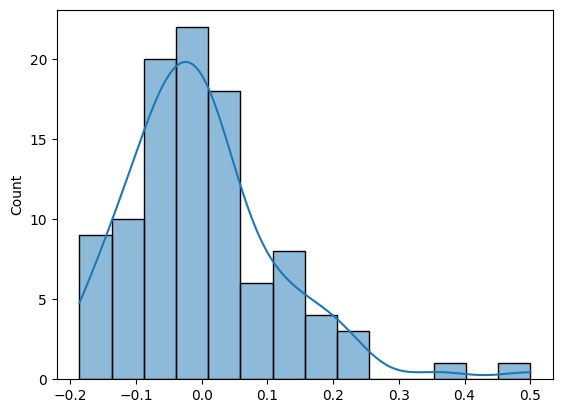

In [233]:
# Plot histogram of residuals for normality assumption

sns.histplot(residuals, kde = True)

**Observations -**

*   We can see that the error terms are normally distributed, although mildly skewed. The assumption of normality is satisfied.


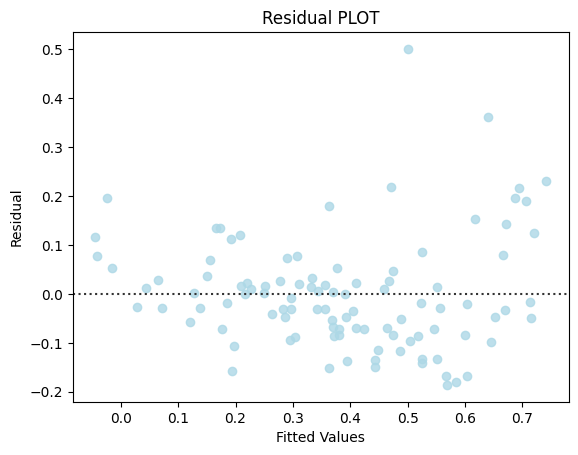

In [234]:
#Linearity of variables

#predicted values
fitted = lm_final_statsmodel4.fittedvalues

sns.residplot(x = fitted, y = residuals, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations -**

*   There is no dsicernable pattern between the fitted values and the residuals.



**Using the Goldfeld–Quandt test to check homoscedasticity**

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals are hetroscedastic

In [235]:
#importing necessary libraries

from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

import statsmodels.stats.api as sms

from statsmodels.compat import lzip

In [236]:
#renewing the final model tested

test_scaled.head()

test_scaled_goldfeld = test_scaled.drop(["INDUS", "CHAS", "NOX", "AGE", "RAD", "TAX", "AGE_DIS", "INDUS_DIS", "CRIM_transform", "ZN_transform", "clipped_RM", "clipped_CRIM", "clipped_ZN"], axis = 1)

test_scaled_goldfeld_features = test_scaled_goldfeld.drop("MEDV", axis = 1)


In [237]:
#hypothesis testing

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(test_scaled_goldfeld['MEDV'], test_scaled_goldfeld_features)

lzip(name, test)

[('F statistic', np.float64(0.5762843927254214)),
 ('p-value', np.float64(0.9661508970922186))]

**Observations -**

*   The p-value is well above the level of significance for rejecting the null hypothesis, therefor the residuals are homoscedastic.



We have verified all the assumptions of the linear regression model. The final equation of the model is as follows:

## Final Model

Median House Value   = 1.0098 - 0.2475 * NOX -0.1741 * CRIM  -0.4471 * DIS  +0.0234 * ZN -0.2376 * PTRATIO -0.6347 * LSTAT

## Actionable Insights and Recommendations



*   From the above equation, we can interpret that with a one unit positive change in the ZN variable (proporiton of residential land zoned), there is a marginal  positive influence on the 1970 Boston town/suburb price of 0.0234 (i.e. 234 dollars), cetirus paribus.

*   The most important factors towards the house prices in the Boston area in 1970 are largely inversely correlated/influenced, outside of the ZN variable. i.e. we could predict that a one-step unit increase in Nitric Oxide concentration, crime rate per capita, distance from major employment centers, pupil-teacher ratio, and proportion of lower status population would all drive a lower median house price for the town/suburb in question.

*   The above equation allows us to predict the price of any houses in the Boston area that are new or not included in the data set, should the stakeholder be interested in exploring new housing and/or revaluing existing homes.



___